<a href="https://colab.research.google.com/github/wbjimmer/Machine-Learning/blob/main/week_8_homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ex. 16.1**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
# sns.set(font_scale=2)

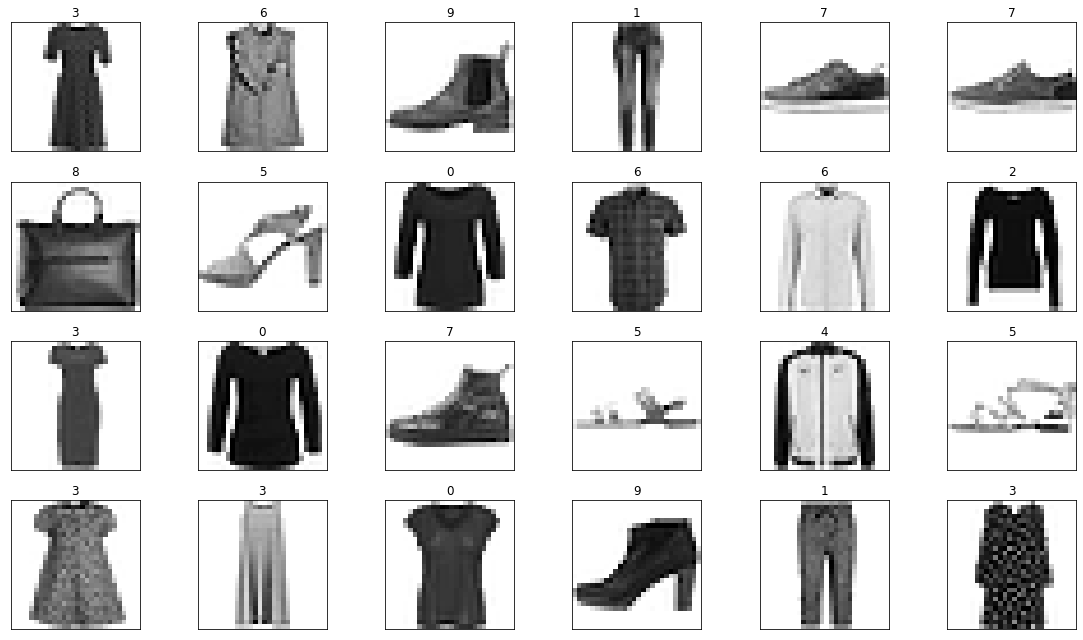

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [13]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255

In [18]:
X_test = X_test.astype('float32') / 255

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)

In [21]:
y_train.shape

(60000, 10)

In [22]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
y_test = to_categorical(y_test)

In [24]:
y_test.shape

(10000, 10)

In [25]:
from tensorflow.keras.models import Sequential 

In [26]:
cnn = Sequential() 

In [27]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [28]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [29]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [31]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
cnn.add(Flatten())

In [33]:
cnn.add(Dense(units=128, activation='relu'))

In [34]:
cnn.add(Dense(units=10, activation='softmax'))

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

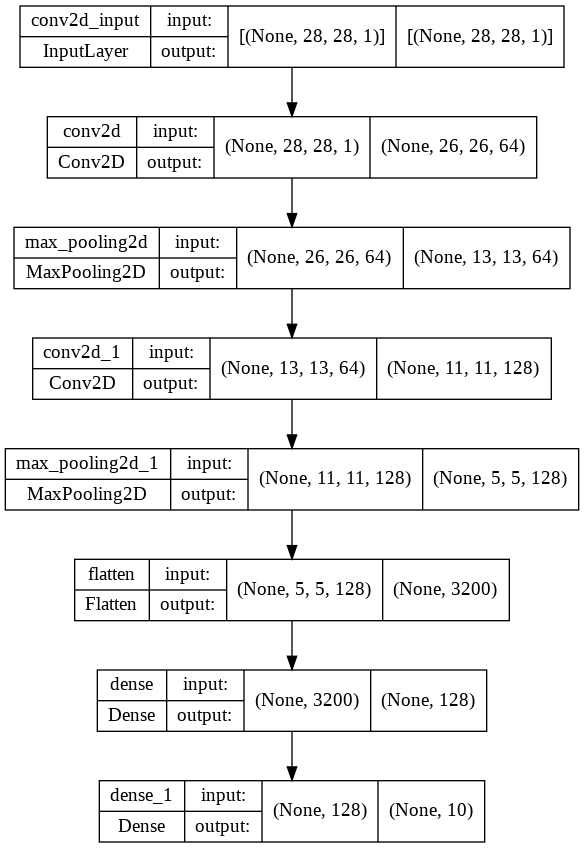

In [36]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [37]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 127s 149ms/step - loss: 0.4692 - accuracy: 0.8311 - val_loss: 0.3444 - val_accuracy: 0.8748
Epoch 2/5
844/844 [==============================] - 116s 137ms/step - loss: 0.3088 - accuracy: 0.8876 - val_loss: 0.2785 - val_accuracy: 0.9007
Epoch 3/5
844/844 [==============================] - 121s 143ms/step - loss: 0.2603 - accuracy: 0.9044 - val_loss: 0.2576 - val_accuracy: 0.9060
Epoch 4/5
844/844 [==============================] - 115s 136ms/step - loss: 0.2262 - accuracy: 0.9163 - val_loss: 0.2338 - val_accuracy: 0.9155
Epoch 5/5
844/844 [==============================] - 114s 135ms/step - loss: 0.1979 - accuracy: 0.9262 - val_loss: 0.2485 - val_accuracy: 0.9113


In [39]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.2637 - accuracy: 0.9059


In [40]:
loss

0.2636823356151581

In [41]:
accuracy

0.9059000015258789

In [42]:
predictions = cnn.predict(X_test)

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [44]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000077664%
1: 0.0000171162%
2: 0.0000608695%
3: 0.0000019774%
4: 0.0000102742%
5: 0.0445857644%
6: 0.0000048254%
7: 0.0503724208%
8: 0.0000219032%
9: 99.9049127102%


In [45]:
images = X_test.reshape((10000, 28, 28))

In [46]:
incorrect_predictions = []

In [47]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [48]:
len(incorrect_predictions)  # number of incorrect predictions

941

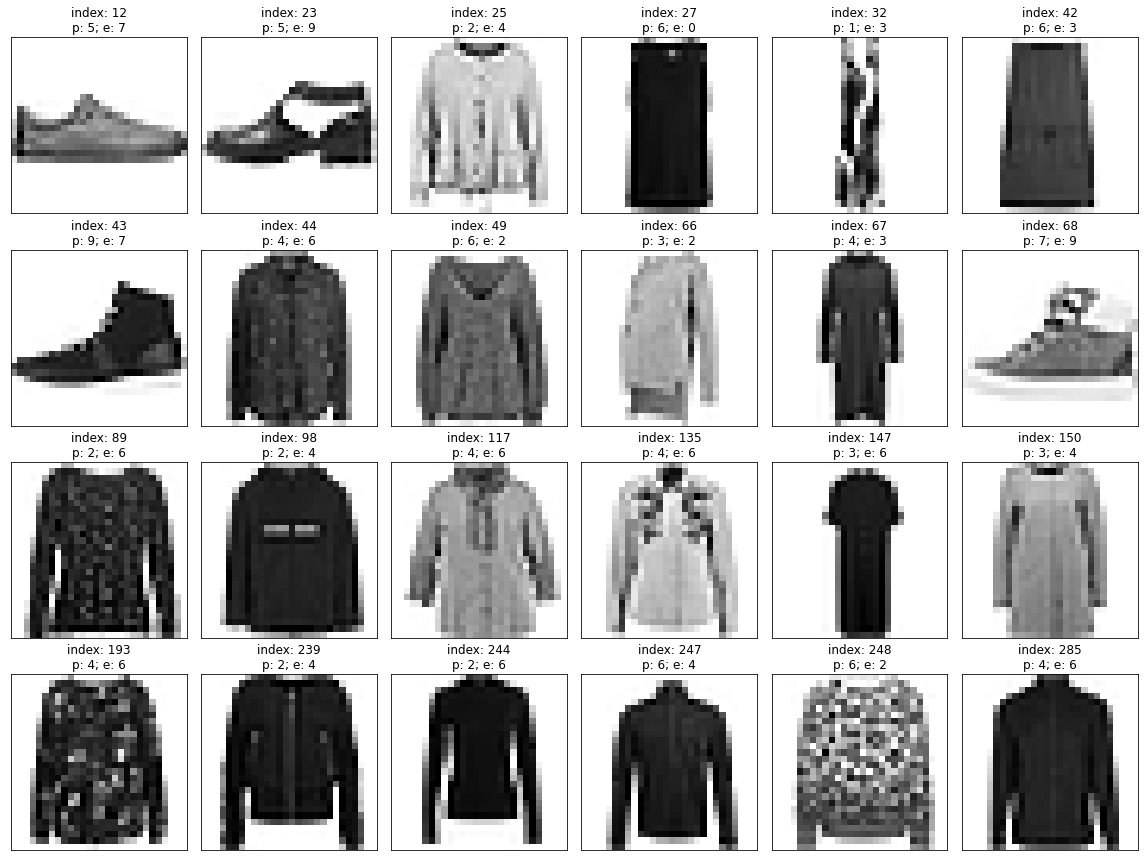

In [49]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [50]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [51]:
display_probabilities(predictions[340])

0: 0.0300540676%
1: 0.0017697224%
2: 3.7672087550%
3: 0.0074916366%
4: 94.6434020996%
5: 0.0006785835%
6: 0.6277302746%
7: 0.0003037037%
8: 0.9194970131%
9: 0.0018640121%


In [52]:
display_probabilities(predictions[740])

0: 0.3246032633%
1: 0.0029751667%
2: 0.0582552457%
3: 98.8790988922%
4: 0.1035595895%
5: 0.0028168875%
6: 0.6047508679%
7: 0.0007360227%
8: 0.0227269367%
9: 0.0004855548%


In [53]:
display_probabilities(predictions[1260])

0: 99.3211865425%
1: 0.0000042082%
2: 0.0005777967%
3: 0.0002848903%
4: 0.0001005992%
5: 0.0000012067%
6: 0.6778385490%
7: 0.0000000033%
8: 0.0000054741%
9: 0.0000002896%


Ex. 16.4

In [56]:
from tensorflow.keras.datasets import fashion_mnist

In [57]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [58]:
X_train.shape

(60000, 28, 28)

In [59]:
y_train.shape

(60000,)

In [60]:
X_test.shape

(10000, 28, 28)

In [61]:
y_test.shape

(10000,)

In [62]:
%matplotlib inline

In [63]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [65]:
# sns.set(font_scale=2)

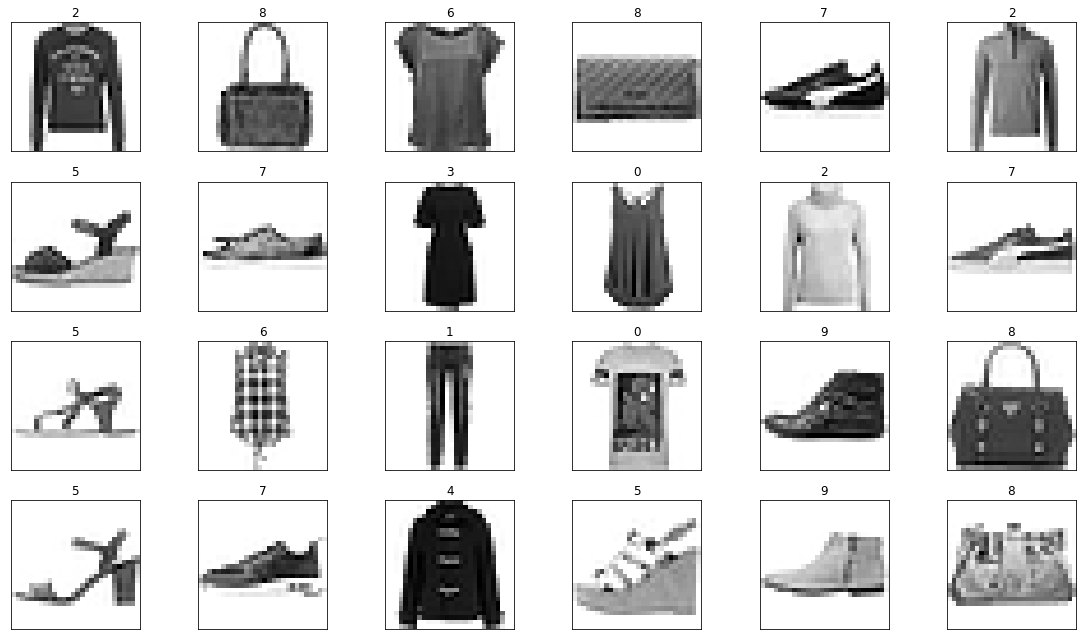

In [66]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [67]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [68]:
X_train.shape

(60000, 28, 28, 1)

In [69]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [70]:
X_test.shape

(10000, 28, 28, 1)

In [71]:
X_train = X_train.astype('float32') / 255

In [72]:
X_test = X_test.astype('float32') / 255

In [73]:
from tensorflow.keras.utils import to_categorical

In [74]:
y_train = to_categorical(y_train)

In [75]:
y_train.shape

(60000, 10)

In [76]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [77]:
y_test = to_categorical(y_test)

In [78]:
y_test.shape

(10000, 10)

In [79]:
from tensorflow.keras.models import Sequential 

In [80]:
cnn = Sequential() 

In [81]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [82]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [83]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [84]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [85]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [86]:
cnn.add(Flatten())

In [87]:
cnn.add(Dense(units=4096, activation='relu'))

In [88]:
cnn.add(Dense(units=4096, activation='softmax'))

In [89]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)             

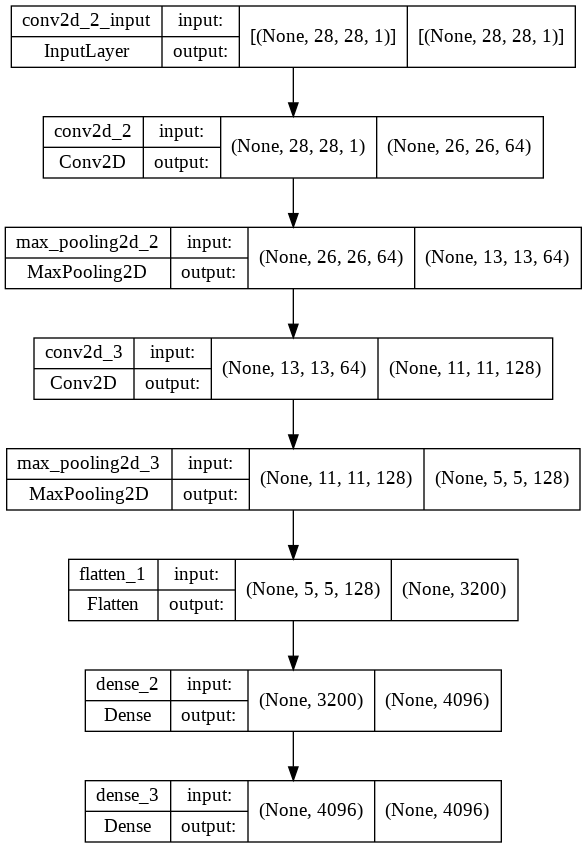

In [90]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [91]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [93]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


ValueError: ignored

In [94]:
loss, accuracy = cnn.evaluate(X_test, y_test)

ValueError: ignored

In [95]:
loss

0.2636823356151581

In [96]:
accuracy

0.9059000015258789

In [97]:
predictions = cnn.predict(X_test)

In [98]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [99]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0243126327%
1: 0.0245400151%
2: 0.0239093046%
3: 0.0239235902%
4: 0.0241360234%
5: 0.0242126029%
6: 0.0235341795%
7: 0.0248175376%
8: 0.0246573880%
9: 0.0257075269%
10: 0.0261864829%
11: 0.0242000446%
12: 0.0234091727%
13: 0.0246719865%
14: 0.0248890137%
15: 0.0237756540%
16: 0.0254748564%
17: 0.0248405471%
18: 0.0243843868%
19: 0.0242211900%
20: 0.0243093658%
21: 0.0240875495%
22: 0.0239552348%
23: 0.0242962458%
24: 0.0237020111%
25: 0.0252192491%
26: 0.0259350025%
27: 0.0251248159%
28: 0.0236224005%
29: 0.0237295433%
30: 0.0253659382%
31: 0.0246889016%
32: 0.0253386097%
33: 0.0256853207%
34: 0.0256128784%
35: 0.0246742857%
36: 0.0241516114%
37: 0.0252085039%
38: 0.0250540761%
39: 0.0233769155%
40: 0.0252394937%
41: 0.0237273503%
42: 0.0232581544%
43: 0.0240654423%
44: 0.0247734628%
45: 0.0239677785%
46: 0.0245839823%
47: 0.0251856691%
48: 0.0243528266%
49: 0.0234957406%
50: 0.0244784431%
51: 0.0257630454%
52: 0.0241407979%
53: 0.0239702975%
54: 0.0248521392%
55: 0.0244118652%
56

In [100]:
images = X_test.reshape((10000, 28, 28))

In [101]:
incorrect_predictions = []

In [102]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [103]:
len(incorrect_predictions)  # number of incorrect predictions

10000

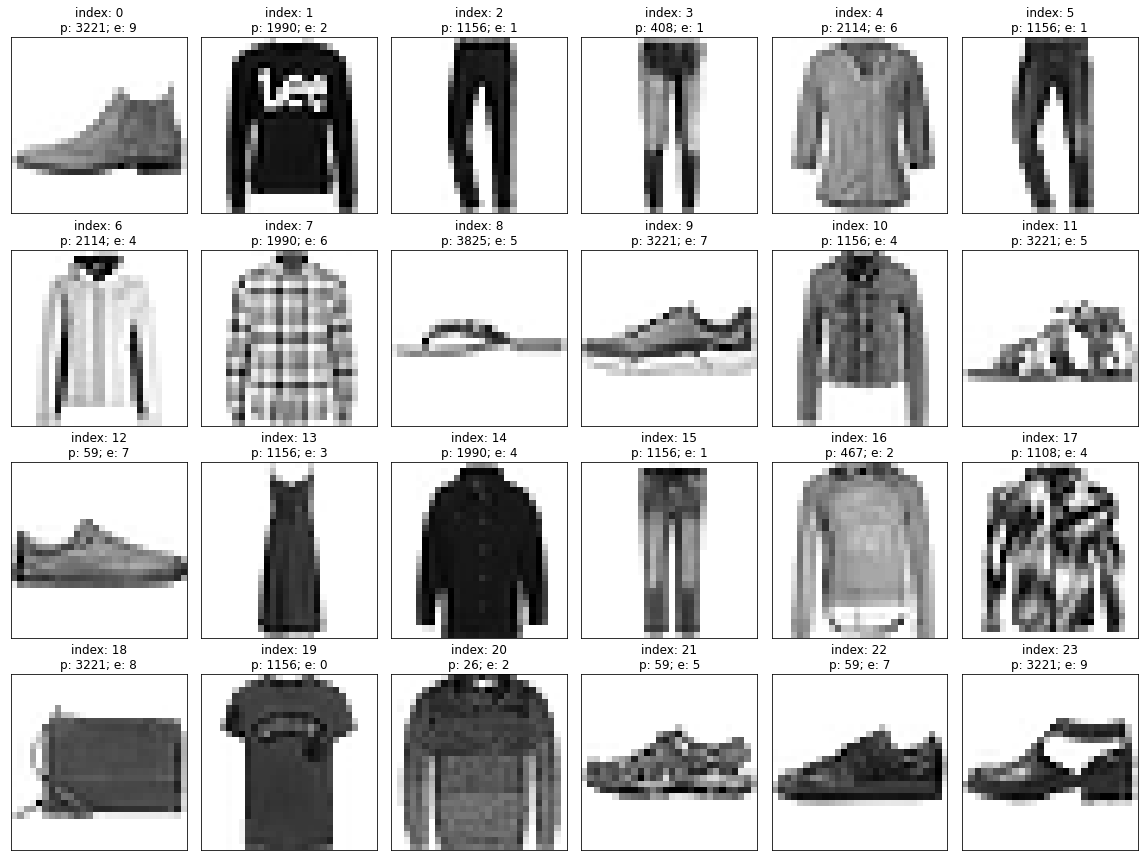

In [104]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [105]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [106]:
display_probabilities(predictions[340])

0: 0.0233610903%
1: 0.0235370448%
2: 0.0241603542%
3: 0.0240344772%
4: 0.0233924657%
5: 0.0245718606%
6: 0.0233931001%
7: 0.0241428279%
8: 0.0241144939%
9: 0.0273295998%
10: 0.0270574703%
11: 0.0246235548%
12: 0.0226300530%
13: 0.0248520140%
14: 0.0249681558%
15: 0.0236898719%
16: 0.0252086553%
17: 0.0259871827%
18: 0.0240056033%
19: 0.0237030195%
20: 0.0234088628%
21: 0.0244519440%
22: 0.0238682085%
23: 0.0248088269%
24: 0.0238640045%
25: 0.0256160711%
26: 0.0280018750%
27: 0.0251872960%
28: 0.0233351340%
29: 0.0234313804%
30: 0.0246615615%
31: 0.0244288560%
32: 0.0263061753%
33: 0.0268781645%
34: 0.0265313633%
35: 0.0245974225%
36: 0.0239564586%
37: 0.0262974558%
38: 0.0265160692%
39: 0.0220289861%
40: 0.0259860099%
41: 0.0225948097%
42: 0.0225659096%
43: 0.0234270934%
44: 0.0251974183%
45: 0.0243520073%
46: 0.0242812705%
47: 0.0249029807%
48: 0.0230291305%
49: 0.0219226815%
50: 0.0230351885%
51: 0.0260302244%
52: 0.0246987765%
53: 0.0231082246%
54: 0.0251965335%
55: 0.0251697493%
56

In [107]:
display_probabilities(predictions[740])

0: 0.0228756195%
1: 0.0238976427%
2: 0.0242264941%
3: 0.0235880143%
4: 0.0230352816%
5: 0.0243192917%
6: 0.0240891779%
7: 0.0248096359%
8: 0.0238949768%
9: 0.0261942507%
10: 0.0264003756%
11: 0.0248250522%
12: 0.0225737735%
13: 0.0241358590%
14: 0.0259293243%
15: 0.0234551029%
16: 0.0249030971%
17: 0.0254045153%
18: 0.0242987066%
19: 0.0240690293%
20: 0.0235973363%
21: 0.0244974566%
22: 0.0243809831%
23: 0.0249924342%
24: 0.0237595275%
25: 0.0255805964%
26: 0.0262311311%
27: 0.0251738209%
28: 0.0230330901%
29: 0.0233049985%
30: 0.0236874141%
31: 0.0253971346%
32: 0.0255866762%
33: 0.0260326691%
34: 0.0259957538%
35: 0.0242301714%
36: 0.0239487184%
37: 0.0264931849%
38: 0.0252287660%
39: 0.0227726909%
40: 0.0248964527%
41: 0.0233381361%
42: 0.0223460433%
43: 0.0232062725%
44: 0.0245049974%
45: 0.0243639253%
46: 0.0247795426%
47: 0.0251740246%
48: 0.0236828535%
49: 0.0220691640%
50: 0.0229767393%
51: 0.0267412601%
52: 0.0241656511%
53: 0.0226592718%
54: 0.0254415325%
55: 0.0241724818%
56

In [ ]:
display_probabilities(predictions[1260])

0: 99.3211865425%
1: 0.0000042082%
2: 0.0005777967%
3: 0.0002848903%
4: 0.0001005992%
5: 0.0000012067%
6: 0.6778385490%
7: 0.0000000033%
8: 0.0000054741%
9: 0.0000002896%
